<a href="https://colab.research.google.com/github/pedrohp09/Machine-Learning/blob/main/Atividade_1_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

atividade 1 
aluno : vilgledyson nobrega dos santos
professor : ricardo roberto 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
iris = sns.load_dataset('iris')
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas as características numéricas
X = iris.iloc[:, :-1].values  # As 4 primeiras colunas
y = iris.iloc[:, -1].values   # A coluna de classe

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print("Dados normalizados (as 5 primeiras amostras):")
print(X_normalized[:5])


Dados normalizados (as 5 primeiras amostras):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [ ]:
# Calcular a matriz de covariância
cov_matrix = np.cov(X_normalized.T)
print("Matriz de Covariância:")
print(cov_matrix)


Matriz de Covariância:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [ ]:
# Calcular os valores e vetores próprios
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print("Valores Próprios:")
print(eigen_values)
print("\nVetores Próprios:")
print(eigen_vectors)


Valores Próprios:
[2.93808505 0.9201649  0.14774182 0.02085386]

Vetores Próprios:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
# Ordenar os valores próprios e os vetores próprios correspondentes
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

print("Valores Próprios Ordenados:")
print(sorted_eigenvalues)
print("\nVetores Próprios Ordenados:")
print(sorted_eigenvectors)


Valores Próprios Ordenados:
[2.93808505 0.9201649  0.14774182 0.02085386]

Vetores Próprios Ordenados:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
# Selecionar os dois primeiros componentes principais
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
print("Componentes Principais Selecionados:")
print(eigenvector_subset)


Componentes Principais Selecionados:
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [ ]:
# Transformar os dados
X_reduced = np.dot(X_normalized, eigenvector_subset)

print("Dados Reduzidos (as 5 primeiras amostras):")
print(X_reduced[:5])


Dados Reduzidos (as 5 primeiras amostras):
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


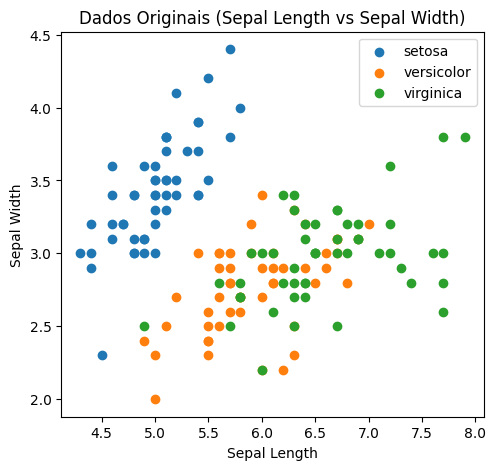

In [ ]:
# Visualizar os dados originais (usando as duas primeiras características)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for species in np.unique(y):
    plt.scatter(X[y == species, 0], X[y == species, 1], label=species)
plt.title('Dados Originais (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()


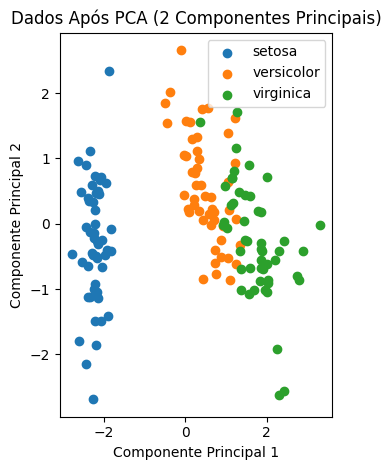

In [ ]:
# Visualizar os dados transformados
plt.subplot(1, 2, 2)
for species in np.unique(y):
    plt.scatter(X_reduced[y == species, 0], X_reduced[y == species, 1], label=species)
plt.title('Dados Após PCA (2 Componentes Principais)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()

plt.tight_layout()
plt.show()
